In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [7]:
sp_500 = pd.read_csv("../data/NFLX.csv")

In [8]:
sp_500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [9]:
sp_500.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

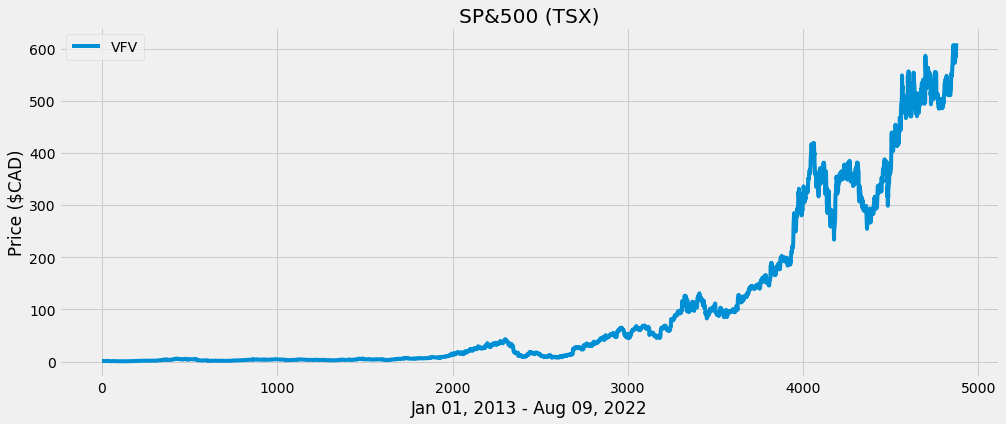

In [10]:
#plotting dataset with matplotlib 

plt.figure(figsize=(15,6))
plt.plot(sp_500['Adj Close'], label = 'VFV')
plt.title('SP&500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

In [12]:
#simple moving average.

EMA30 = pd.DataFrame()
EMA30['Close'] = sp_500['Adj Close'].ewm(span=30, adjust=False).mean()
EMA30.tail()

,Close
4869,571.503006
4870,572.866684
4871,573.575283
4872,575.219459
4873,577.485302


In [13]:
EMA100 = pd.DataFrame()
EMA100['Close'] = sp_500['Adj Close'].ewm(span=100, adjust=False).mean()
EMA100.tail()

,Close
4869,542.184849
4870,543.183961
4871,543.989229
4872,545.079739
4873,546.372022


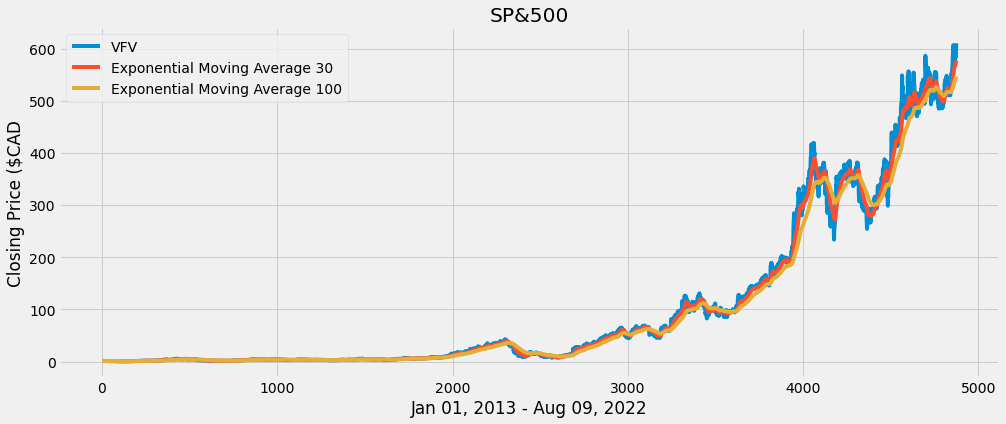

In [14]:
plt.figure(figsize=(15,6))
plt.plot(sp_500['Adj Close'], label = 'VFV') #I decided to use Adj Close price becasue it factors in anything that might affect the stock price after the market closes, like: dividens, splits, etc. 
plt.plot(EMA30['Close'], label = 'Exponential Moving Average 30')
plt.plot(EMA100['Close'], label = 'Exponential Moving Average 100')
plt.title('SP&500')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Closing Price ($CAD')
plt.legend(loc = 'upper left')
plt.show()

In [15]:
#combining everything into new dataset.

data = pd.DataFrame()
data['SP500'] = sp_500['Adj Close']
data['EMA30'] = EMA30['Close']
data['EMA100'] = EMA100['Close']
data.tail()

,SP500,EMA30,EMA100
4869,592.390015,571.503006,542.184849
4870,592.640015,572.866684,543.183961
4871,583.849976,573.575283,543.989229
4872,599.059998,575.219459,545.079739
4873,610.340027,577.485302,546.372022


In [16]:
def signal(data):
    buy = []
    sell = []
    condition = 0
    
    for day in range(len(data)):
        
        if data['EMA30'][day] > data['EMA100'][day]:    #buying when EMA30 cross EMA100 from down to top
            if condition != 1:
                buy.append(data['SP500'][day])
                sell.append(np.nan)
                condition = 1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
            
        elif data['EMA30'][day] < data['EMA100'][day]:  #selling when EMA30 cross EMA100 from top to bottom
            if condition != -1:
                sell.append(data['SP500'][day])
                buy.append(np.nan)
                condition = -1
            else:
                buy.append(np.nan)
                sell.append(np.nan)
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            
    return (buy, sell) 

In [17]:
signals = signal (data)
data['buy'] = signals[0]
data['sell'] = signals[1]
data

,SP500,EMA30,EMA100,buy,sell
0,1.196429,1.196429,1.196429,NaN,NaN
1,1.210000,1.197305,1.196698,1.21,NaN
2,1.157143,1.194713,1.195914,NaN,1.157143
3,1.103571,1.188833,1.194086,NaN,NaN
4,1.071429,1.181259,1.191657,NaN,NaN
...,...,...,...,...,...
4869,592.390015,571.503006,542.184849,NaN,NaN
4870,592.640015,572.866684,543.183961,NaN,NaN
4871,583.849976,573.575283,543.989229,NaN,NaN
4872,599.059998,575.219459,545.079739,NaN,NaN


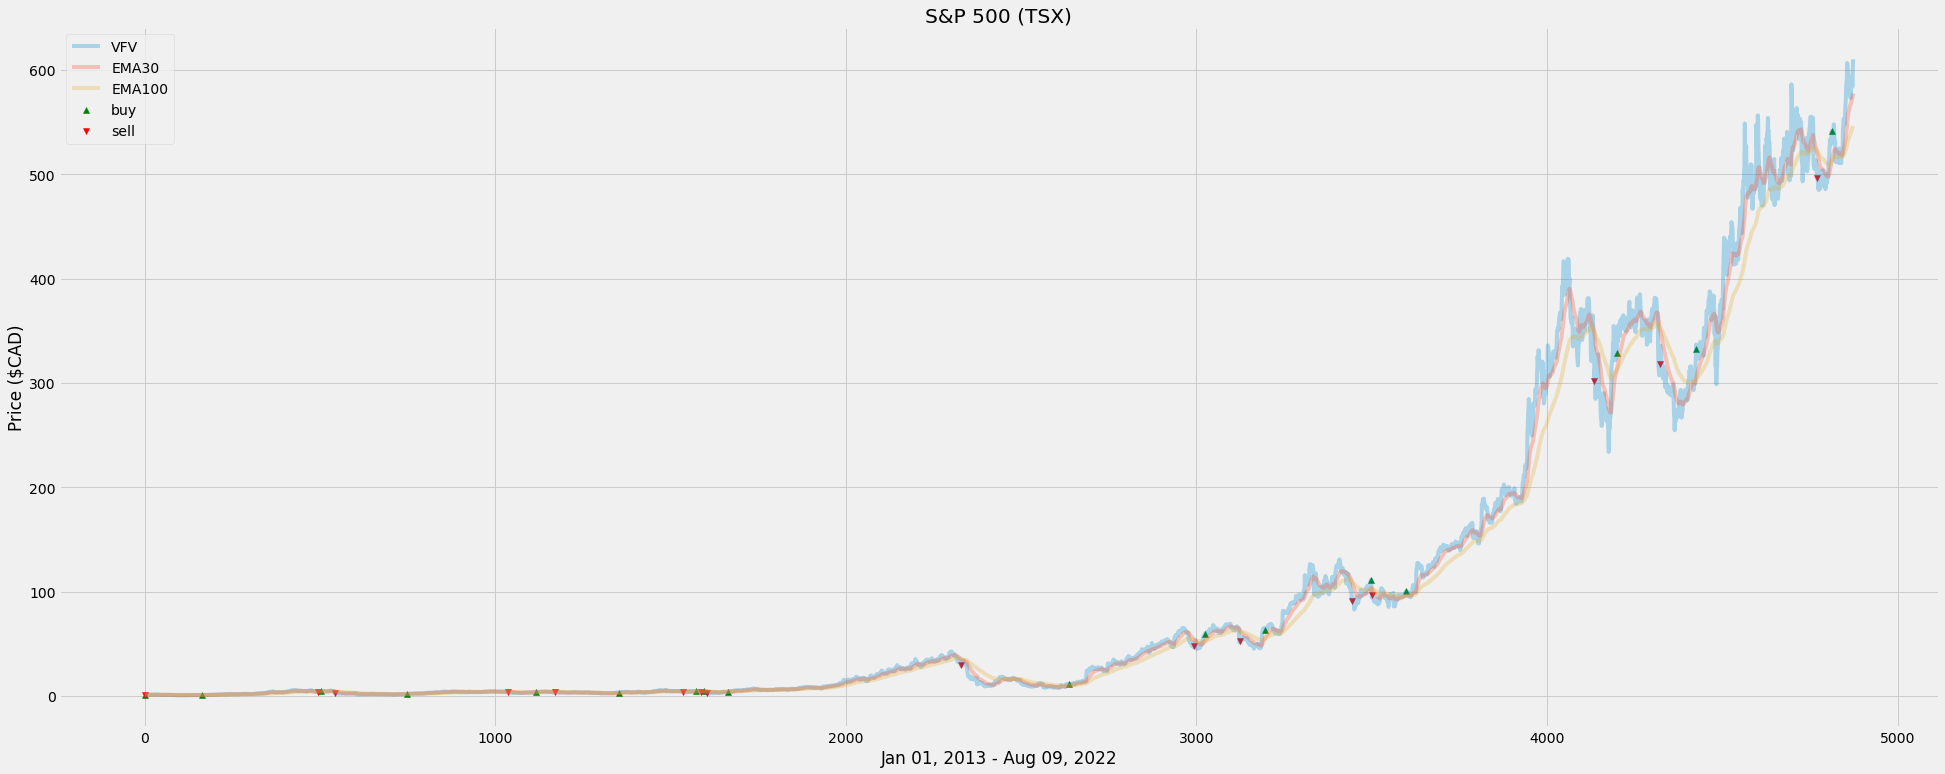

In [18]:
plt.figure(figsize = (30, 12))
plt.plot(data['SP500'], label = 'VFV', alpha = 0.3)
plt.plot(data['EMA30'], label = 'EMA30', alpha = 0.3)
plt.plot(data['EMA100'], label = 'EMA100', alpha = 0.3)
plt.scatter(data.index, data['buy'], label = 'buy', marker = '^', color = 'green')
plt.scatter(data.index, data['sell'], label = 'sell', marker = 'v', color = 'red')
plt.title('S&P 500 (TSX)')
plt.xlabel('Jan 01, 2013 - Aug 09, 2022')
plt.ylabel('Price ($CAD)')
plt.legend(loc = 'upper left')
plt.show()

#Insights
- The buying signal appears to be effective. Selling not so much.
- It is also important to consider when to exit a trade. (Need to work on that).
- A stop loss must be set large enough for the trade to be successful.